In [84]:
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns


In [2]:
df=pd.read_csv('covid_19_data.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df=df.rename(columns={'Country/Region':'Country'})
df=df.rename(columns={'Province/State':'State','ObservationDate':'Date'})

In [5]:
df

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [6]:
df_countries=df.groupby(['Country','Date']).sum().reset_index().sort_values('Date',ascending=False)
df_countries

,Country,Date,SNo,Confirmed,Deaths,Recovered
6404,Peru,04/19/2020,16538,15628.0,400.0,6811.0
8093,Tanzania,04/19/2020,16571,170.0,7.0,11.0
4443,Kyrgyzstan,04/19/2020,16499,554.0,5.0,133.0
8922,Vietnam,04/19/2020,16585,268.0,0.0,202.0
862,Belgium,04/19/2020,16425,38496.0,5683.0,8757.0
234,Angola,04/19/2020,16414,24.0,2.0,6.0
6935,Saint Vincent and the Grenadines,04/19/2020,16548,12.0,0.0,1.0
2845,Gambia,04/19/2020,16469,10.0,1.0,2.0
4470,Laos,04/19/2020,16500,19.0,0.0,2.0
5553,Montenegro,04/19/2020,16521,308.0,5.0,55.0


In [7]:
df_countries=df_countries.drop_duplicates(subset=['Country'])
df_countries=df_countries[df_countries.Confirmed>0]

In [8]:
df_countries

,Country,Date,SNo,Confirmed,Deaths,Recovered
6404,Peru,04/19/2020,16538,15628.0,400.0,6811.0
8093,Tanzania,04/19/2020,16571,170.0,7.0,11.0
4443,Kyrgyzstan,04/19/2020,16499,554.0,5.0,133.0
8922,Vietnam,04/19/2020,16585,268.0,0.0,202.0
862,Belgium,04/19/2020,16425,38496.0,5683.0,8757.0
234,Angola,04/19/2020,16414,24.0,2.0,6.0
6935,Saint Vincent and the Grenadines,04/19/2020,16548,12.0,0.0,1.0
2845,Gambia,04/19/2020,16469,10.0,1.0,2.0
4470,Laos,04/19/2020,16500,19.0,0.0,2.0
5553,Montenegro,04/19/2020,16521,308.0,5.0,55.0


In [9]:
fig=go.Figure(data=go.Choropleth(locations=df_countries['Country'],
              locationmode='country names',
              z=df_countries['Confirmed'],
              colorscale='reds',marker_line_color='black',
              marker_line_width=1))
fig.update_layout(title_text='Confirmed cases as of 8th April,2020',
                 title_x=0.5,
                 geo=dict(showframe=False,showcoastlines=False,projection_type='equirectangular'))

Above is the code for a static Choropleth map 

In [10]:
df_countrydate=df[df.Confirmed>0]
df_countrydate=df_countrydate.groupby(['Date','Country']).sum().reset_index()
df_countrydate

,Date,Country,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Japan,36,2.0,0.0,0.0
1,01/22/2020,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,373,547.0,17.0,28.0
3,01/22/2020,South Korea,38,1.0,0.0,0.0
4,01/22/2020,Taiwan,29,1.0,0.0,0.0
5,01/22/2020,Thailand,37,2.0,0.0,0.0
6,01/22/2020,US,32,1.0,0.0,0.0
7,01/23/2020,Hong Kong,51,2.0,0.0,0.0
8,01/23/2020,Japan,74,1.0,0.0,0.0
9,01/23/2020,Macau,59,2.0,0.0,0.0


In [11]:
fig=px.choropleth(df_countrydate,locations='Country', 
                  locationmode='country names',
                  color='Confirmed',
                  hover_name='Country',
                  animation_frame='Date')
fig.update_layout(title_text='Global spread of Coronavirus as of 8th April,2020',title_x=0.5,
                 geo=dict(showframe=False,showcoastlines=False))
fig.show()



Above code is for a dynamic Choropleth 

In [12]:
df_countrydate=df_countrydate.drop('SNo',axis=1)
df_countrydate=df_countrydate.drop('Recovered',axis=1)

In [13]:
df_countrydate

,Date,Country,Confirmed,Deaths
0,01/22/2020,Japan,2.0,0.0
1,01/22/2020,Macau,1.0,0.0
2,01/22/2020,Mainland China,547.0,17.0
3,01/22/2020,South Korea,1.0,0.0
4,01/22/2020,Taiwan,1.0,0.0
5,01/22/2020,Thailand,2.0,0.0
6,01/22/2020,US,1.0,0.0
7,01/23/2020,Hong Kong,2.0,0.0
8,01/23/2020,Japan,1.0,0.0
9,01/23/2020,Macau,2.0,0.0


In [14]:
df1=df_countrydate.groupby('Country').sum().reset_index()

In [15]:
df1

,Country,Confirmed,Deaths
0,Azerbaijan,1.0,0.0
1,"('St. Martin',)",2.0,0.0
2,Afghanistan,11903.0,356.0
3,Albania,10233.0,512.0
4,Algeria,38094.0,4914.0
5,Andorra,13832.0,523.0
6,Angola,367.0,44.0
7,Antigua and Barbuda,416.0,29.0
8,Argentina,43397.0,1651.0
9,Armenia,22182.0,241.0


NameError: name 'df_test' is not defined

Above code is to find the index number for any country

In [17]:
df1.Country[94]


'India'

In [18]:
df1.Confirmed[94]

167476.0

In [19]:
df_1=df.groupby('Country').sum().reset_index()
df_1.Confirmed[122]

5734583.0

In [20]:
df=df.drop('SNo',axis=1)


In [21]:
df_test=df[df.Confirmed>0]
df_test=df_test.groupby('Country').sum().reset_index()

In [22]:
df_india=df.copy()

In [23]:
i=0
for name in df_india.Country:
    if name=='India':
        i+=1
    else:
        df_india=df_india.drop(i)
        i+=1

In [24]:
df_india=df_india.reset_index(drop=True)

In [25]:
df_india=df_india.drop('State',axis=1)

In [26]:
df_india=df_india.drop('Last Update',axis=1)

In [27]:
df_india=df_india.reset_index(drop=True)
df_india.index=df_india.index+1
df_india

,Date,Country,Confirmed,Deaths,Recovered
1,01/30/2020,India,1.0,0.0,0.0
2,01/31/2020,India,1.0,0.0,0.0
3,02/01/2020,India,1.0,0.0,0.0
4,02/02/2020,India,2.0,0.0,0.0
5,02/03/2020,India,3.0,0.0,0.0
6,02/04/2020,India,3.0,0.0,0.0
7,02/05/2020,India,3.0,0.0,0.0
8,02/06/2020,India,3.0,0.0,0.0
9,02/07/2020,India,3.0,0.0,0.0
10,02/08/2020,India,3.0,0.0,0.0


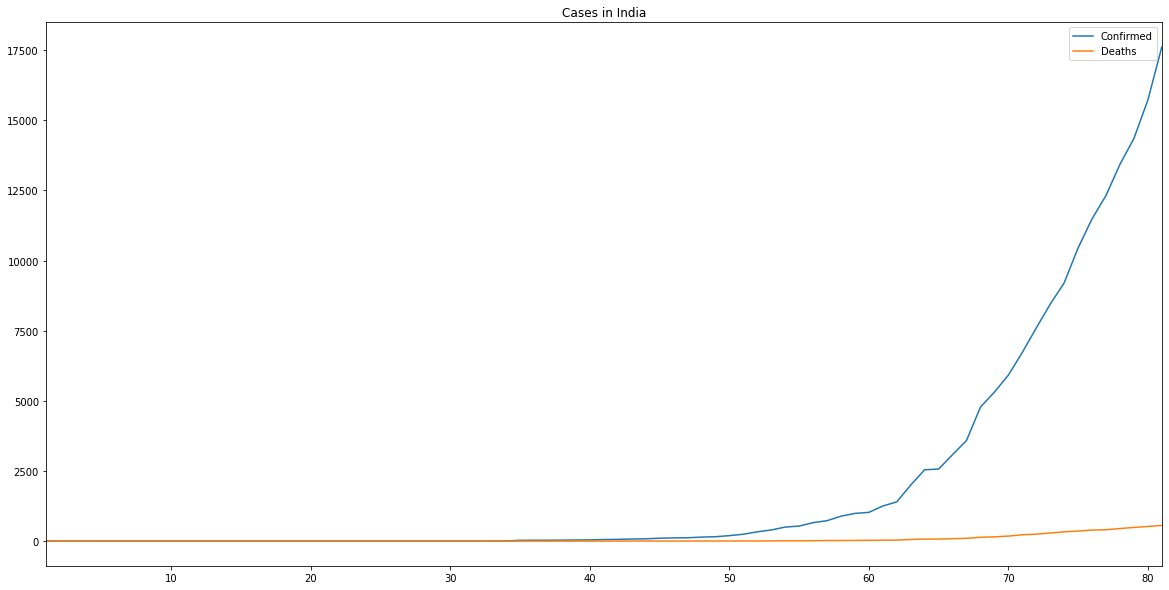

In [28]:
x=df_india[['Confirmed','Deaths']].plot(legend=True,figsize=(20,10),title='Cases in India')



/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



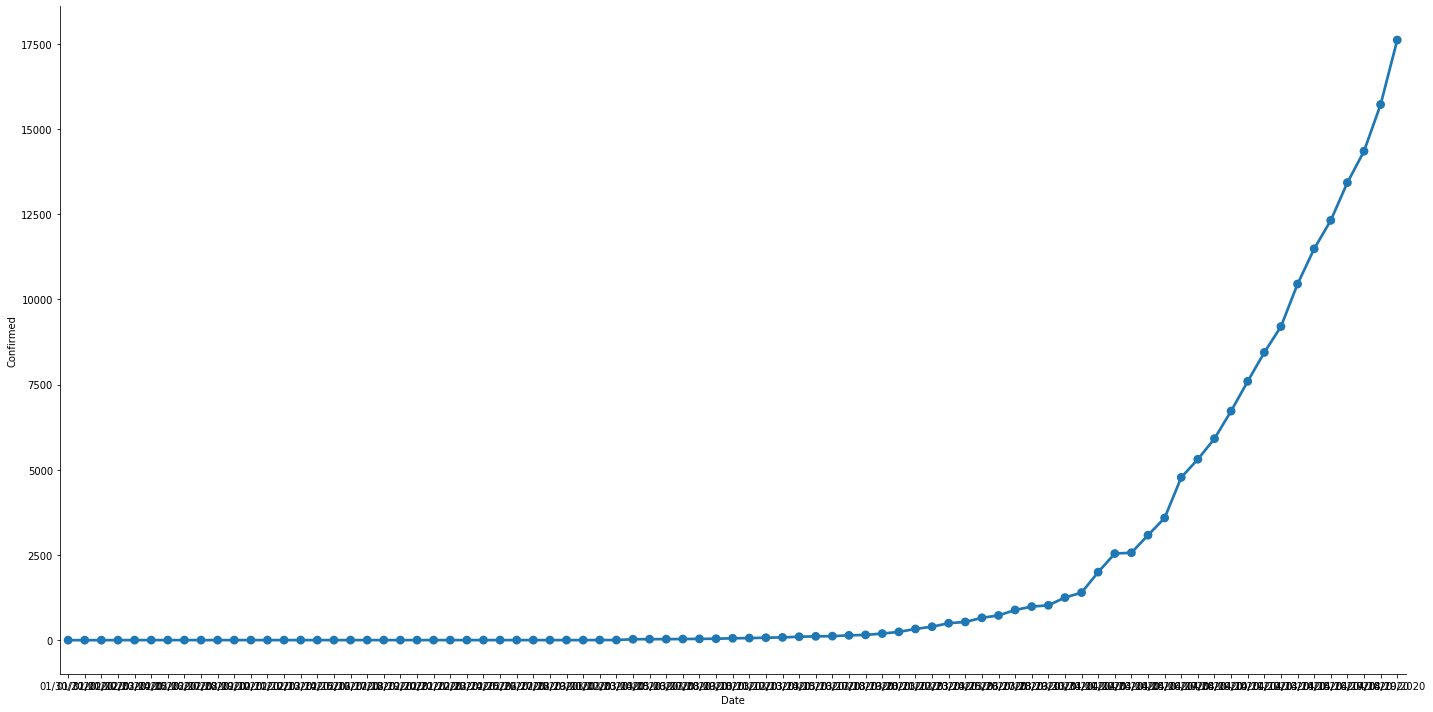

In [29]:
sns.factorplot('Date','Confirmed',data=df_india,height=10,aspect=2)

In [48]:
df_updated=df.copy()

In [49]:
i=0
for name in df_updated.Date:
    if name=='04/19/2020':
        i+=1
    else:
        df_updated=df_updated.drop(i)
        i+=1

In [50]:
df_updated=df_updated.drop('State',axis=1)


In [51]:
df_updated=df_updated.drop('Last Update',axis=1)

In [52]:
df_updated=df_updated.drop('Date',axis=1)

In [53]:
df_updated=df_updated.reset_index(drop=True)

In [54]:
df_updated.index=df_updated.index+1
df_updated

,Country,Confirmed,Deaths,Recovered
1,Afghanistan,996.0,33.0,131.0
2,Albania,562.0,26.0,314.0
3,Algeria,2629.0,375.0,1047.0
4,Andorra,713.0,36.0,235.0
5,Angola,24.0,2.0,6.0
6,Antigua and Barbuda,23.0,3.0,3.0
7,Argentina,2839.0,132.0,709.0
8,Armenia,1291.0,20.0,545.0
9,Austria,14749.0,452.0,10501.0
10,Azerbaijan,1398.0,19.0,712.0


In [55]:
df_updated=df_updated.groupby('Country').sum().reset_index()

In [38]:
df_updated

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,521.0,15.0,32.0
1,Albania,416.0,23.0,182.0
2,Algeria,1761.0,256.0,405.0
3,Andorra,601.0,26.0,71.0
4,Angola,19.0,2.0,2.0
5,Antigua and Barbuda,19.0,2.0,0.0
6,Argentina,1975.0,82.0,375.0
7,Armenia,937.0,12.0,149.0
8,Australia,6215.0,54.0,1793.0
9,Austria,13555.0,319.0,6064.0


In [56]:
i=0
for name in df_updated.Country:
    if name=='India':
        print(i)
        i+=1
    else:
        i+=1

77


In [57]:
df_updated.Confirmed[77]

17615.0

In [58]:
df_updated=df_updated[df_updated.Confirmed>10000]
df_updated=df_updated.reset_index()



In [59]:
df_updated=df_updated.drop('index',axis=1)
df_updated.index=df_updated.index+1

In [64]:
df_updated=df_updated.sort_values(by='Confirmed',ascending=False)
df_updated.reset_index(drop=True,inplace=True)
df_updated.index=df_updated.index +1 
df_updated

,Country,Confirmed,Deaths,Recovered
1,US,759086.0,40661.0,70337.0
2,Spain,198674.0,20453.0,77357.0
3,Italy,178972.0,23660.0,47055.0
4,France,154097.0,19744.0,37183.0
5,Germany,145184.0,4586.0,88000.0
6,UK,121172.0,16095.0,436.0
7,Turkey,86306.0,2017.0,11976.0
8,Mainland China,82735.0,4632.0,77068.0
9,Iran,82211.0,5118.0,57023.0
10,Russia,42853.0,361.0,3291.0


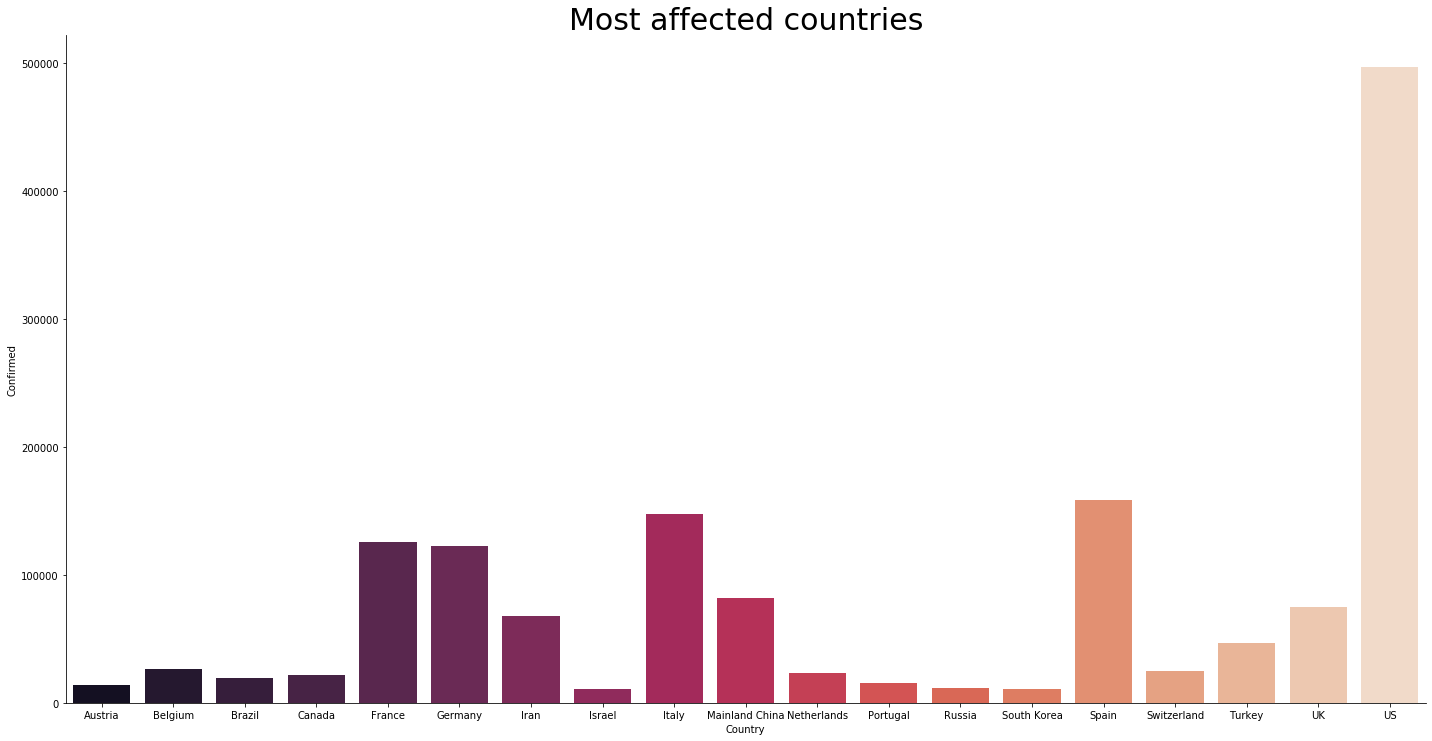

In [44]:
x=sns.factorplot('Country','Confirmed',data=df_updated,height=10,aspect=2,palette='rocket',kind='bar')

title=['Most affected countries']
for ax,title in zip(x.axes.flat,title):
    ax.set_title(title,size=30)

In [72]:
df_india.head()

,Date,Country,Confirmed,Deaths,Recovered,Log Confirmed
1,01/30/2020,India,1.0,0.0,0.0,0.000000
2,01/31/2020,India,1.0,0.0,0.0,0.000000
3,02/01/2020,India,1.0,0.0,0.0,0.000000
4,02/02/2020,India,2.0,0.0,0.0,0.693147
5,02/03/2020,India,3.0,0.0,0.0,1.098612


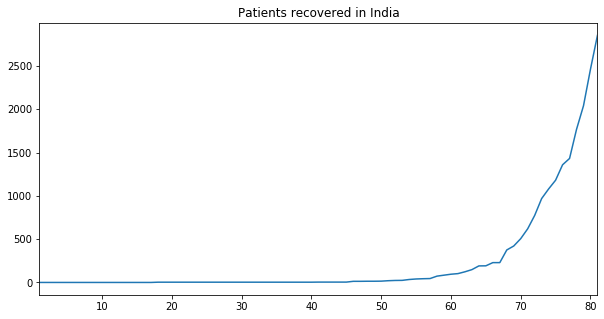

In [46]:
df_india['Recovered'].plot(figsize=(10,5),title='Patients recovered in India')

In [67]:
df_india['Log Confirmed']=np.log(df_india['Confirmed'])

In [69]:
df_india.head()

,Date,Country,Confirmed,Deaths,Recovered,Log Confirmed
1,01/30/2020,India,1.0,0.0,0.0,0.000000
2,01/31/2020,India,1.0,0.0,0.0,0.000000
3,02/01/2020,India,1.0,0.0,0.0,0.000000
4,02/02/2020,India,2.0,0.0,0.0,0.693147
5,02/03/2020,India,3.0,0.0,0.0,1.098612


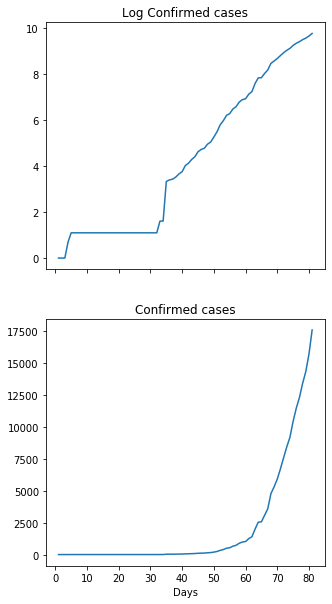

In [82]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(5,10),sharex=True)
ax1.plot(df_india['Log Confirmed'])
ax1.set_title('Log Confirmed cases')
ax2.set_xlabel('Days')
ax2.set_title('Confirmed cases')
ax2.plot(df_india['Confirmed'])